In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load data and preprossing

In [63]:
df = pd.read_csv("USA_Housing.csv")

In [64]:
df.head()

,AreaIncome,Avg. Area House Age,AreaNumberofRooms,Avg. Area Number of Bedrooms,AreaPopulation,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AreaIncome                    5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   AreaNumberofRooms             5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   AreaPopulation                5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [65]:
df.drop(df[['Address']],axis = 1, inplace = True)

In [66]:
df.head()

,AreaIncome,Avg. Area House Age,AreaNumberofRooms,Avg. Area Number of Bedrooms,AreaPopulation,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


# Build Loss Function

In [40]:
def loss(x_train, y_train, c1, c2, c3, c4):
    n = len(x_train)  # get the length of the training set.
    y_predicted = c2 * x_train.iloc[:, 0] + c3 * x_train.iloc[:, 1] + c4 * x_train.iloc[:, 2] + c1  # calculate the prediction.
    cost = (1 / n) * sum([val**2 for val in (y_train - y_predicted)])  # calculate the mean square error cost.

# Build gradient decent function 
- use equation : Y = 5X1 + 3X2 + 1.5X3 + 6

In [41]:
def gradientDecent(x_train, y_train):
    learn_rate = 0.001
    n = len(x_train)
    c1 = 6  
    c2 = 5 
    c3 = 3  
    c4 = 1.5  
    y_predicted = c2 * x_train.iloc[:, 0] + c3 * x_train.iloc[:, 1] + c4 * x_train.iloc[:, 2] + c1

    # minimize the error with gradient decent
    for i in range(150):
        c1 = c1 - learn_rate * (-(2 / n) * sum(y_train - y_predicted))
        c2 = c2 - learn_rate * (-(2 / n) * sum(x_train.iloc[:, 0] * (y_train - y_predicted)))
        c3 = c3 - learn_rate * (-(2 / n) * sum(x_train.iloc[:, 1] * (y_train - y_predicted)))
        c4 = c4 - learn_rate * (-(2 / n) * sum(x_train.iloc[:, 2] * (y_train - y_predicted)))
        loss(x_train, y_train, c1, c2, c3, c4)
    return c1, c2, c3, c4

#  print the test wights

In [42]:
def printWight(c1, c2, c3, c4):
    y_predicted = c2 * x_test.iloc[:, 0] + c3 * x_test.iloc[:, 1] + c4 * x_test.iloc[:, 2] + c1
    return y_predicted

# Calculate accuracy


In [43]:
def accuracy(test, predict):
    right = 0  # record to the right prediction
    for i in range(len(test)):  # loop throw the test label
        if test.index[i] == predict.index[i]:  # if it is the right answer
            right += 1  # increment by one
    print("Accuracy of the model is : ", right / float(len(test)) * 100)

# Split the dataset

In [48]:
standard_x = StandardScaler()
x_train = standard_x.fit_transform(df)
x_test = standard_x.fit_transform(df) 

x_data = df[['AreaIncome', 'AreaNumberofRooms', 'AreaPopulation']]
y_data = df['Price']

#  train test split function.


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
c1, c2, c3, c4 = gradientDecent(x_train, y_train)


# Visulization and printing

In [52]:
print(printWight(c1, c2, c3, c4))
accuracy(y_test, printWight(c1, c2, c3, c4))

4580    1.468457e+15
4732    1.391102e+15
1881    1.910023e+15
1426    1.300781e+15
3485    1.948991e+15
            ...     
2938    1.734047e+15
3962    1.895530e+15
1229    1.748000e+15
2058    1.575941e+15
185     1.531232e+15
Length: 1000, dtype: float64
Accuracy of the model is :  100.0


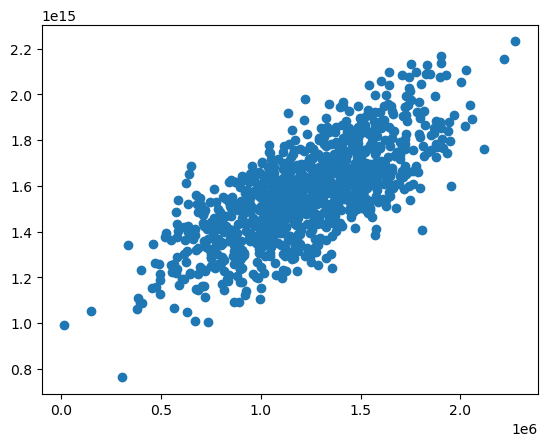

In [61]:
plt.scatter(y_test, printWight(c1, c2, c3, c4))
plt.show()